In [1]:
import os
import json
import numpy as np
import pandas as pd
from collections import OrderedDict


import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
[1,2]
{1,2}

In [88]:
t = (list,set,3,3)
t

(list, set, 3, 3)

In [85]:
id(t)

140368321743824

In [79]:
id(l)

140368322005928

In [2]:
class Run:
    def __init__(self, path):
        self.path = path
        
        with open(os.path.join(self.path, 'params.json'), 'r') as f:
            d = json.load(f)
            if 'dec_f0' not in d:
                d['dec_f0'] = np.NaN
            self.params = OrderedDict(sorted(d.items(), key=lambda x:x[0], reverse=False))

        
        with open(os.path.join(self.path, 'log.txt'), 'r') as f:
            self.logs = f.read()
            
        self.data = self.read_logs()
        self.name = os.path.basename(path)
        
    def __len__(self):
        return len(self.data)
        
    def best(self, val=False, num=1, ascending=False):
        pos = 'Val_acc' if val else 'Acc'
        return self.data.sort_values(pos, ascending=ascending)[:num]
    
    def total_time(self):
        return self.data['Date'][self.__len__()-1]
        
    def read_logs(self):
        data = []
        num_data = []
        for l in self.logs.split('\n'):
            if l:
                d,g,v,va = l.split(',')
                g, v, va = int(g), float(v), float(va)
                data.append([d,g,v,va])
                num_data.append([g,v,va])
        
        df = pd.DataFrame(data, columns=['Date','Epoch','Acc','Val_acc'])
        df['Val_acc'].replace(-1., np.NaN, inplace=True)
        df.fillna(method='ffill', inplace=True)
        df.set_index('Epoch', inplace=True)
        
        timeDF=(pd.to_datetime(df['Date'].str.strip(), format='%H:%M:%S'))
        df['Date'] = timeDF - timeDF[0]
        
        return df
    
    
    def plot(self, cols=None, window=1,limits=[-1,-1], ax=None, x=None):
        if ax is None:
            f,ax = plt.subplots(1)
        if cols is None:
            cols = ['Acc']
        if x is not None:
            cols.append(x)
        
        llim, rlim = limits
        rlim = len(self.data) if rlim <=0 else rlim
        llim = max(0, llim)
        
        
        d = self.data.iloc[llim:rlim,:]
        d = d.loc[:,cols]
        for c in cols:
            if c != 'Date':
                d[c] = d[c].rolling(window).mean() 
        
        d.plot(figsize=(12,7), ax=ax, x=x)

In [3]:
def load_anal(run_paths):
    results = []
    runs = OrderedDict()

    for r in run_paths:
        run = Run(r)
        runs[run.name] = run
        run_best = run.best(num=5)
        dur = run_best['Date'].values[0]
        acc, val_acc = run_best.mean()[['Acc', 'Val_acc']].values
        
        run_best_pct = 100 - int( 100 * (run.total_time() - dur) / run.total_time())
        ending = run.data['Acc'][-10:].mean()
        
        results.append([run.name, dur, ending, acc, val_acc, run_best_pct, *run.params.values()])

    res_df = pd.DataFrame(results, columns=['Name','duration', 'LRM', 'best_acc', 'best_val', 'best_pct', *run.params.keys()])
    return res_df, runs

In [84]:
run_paths = sorted(os.listdir('output/', ))
run_paths = [os.path.join('output', rp) for rp in run_paths if rp.startswith('data')]

In [85]:
df, runs = load_anal(run_paths)

In [86]:
df.sort_values(by='best_val', ascending=False)

,Name,duration,LRM,best_acc,best_val,best_pct,combine_chance,crossover_chance,dec_f0,dec_f1,dec_f2,dec_f3,exp_power,generation_size,generations,mutate_chance,seed,subsample_size
29,data_2020_Apr_27_09:48:22,01:13:21,0.585244,0.663888,0.573820,90,0.4,0.6,12.0,10,8,6,10,400,1000,0.005,0,50
28,data_2020_Apr_26_21:00:56L,00:24:25,0.579375,0.652365,0.570652,88,0.4,0.6,12.0,10,8,6,10,400,400,0.005,0,50
27,data_2020_Apr_26_20:06:49L,00:21:50,0.581742,0.648216,0.569631,92,0.4,0.6,8.0,8,8,4,10,400,400,0.005,0,50
26,data_2020_Apr_26_19:51:56L,00:06:53,0.553728,0.609557,0.541849,97,0.4,0.6,8.0,8,8,8,15,200,200,0.005,0,50
25,data_2020_Apr_26_19:19:37,00:09:43,0.504731,0.565312,0.446541,46,0.4,0.6,NaN,8,8,4,15,400,1000,0.005,0,50
1,data_2020_Apr_26_10:28:10,00:21:03,0.498353,0.542184,0.439649,79,0.1,0.8,NaN,8,8,4,20,100,1000,0.005,0,100
19,data_2020_Apr_26_15:31:32,00:08:57,0.473790,0.514784,0.426375,94,0.4,0.6,NaN,8,6,4,10,200,200,0.005,0,100
10,data_2020_Apr_26_13:25:07,00:08:58,0.476784,0.539243,0.425515,81,0.4,0.6,NaN,8,8,4,50,400,200,0.005,0,50
11,data_2020_Apr_26_13:37:41,00:11:13,0.498886,0.539376,0.422986,100,0.4,0.6,NaN,8,8,4,100,400,200,0.005,0,50
12,data_2020_Apr_26_13:51:51,00:06:56,0.486569,0.521668,0.422683,63,0.4,0.6,NaN,8,8,4,10,400,200,0.005,0,50


In [72]:
#res_df.corr()['best_acc']

In [87]:
plot_df = df[-1:]
#top = df.sort_values(by='best_val', ascending=False)[:1]
#plot_df = pd.concat([plot_df,top])

In [93]:
df.to_csv('run_results.csv')

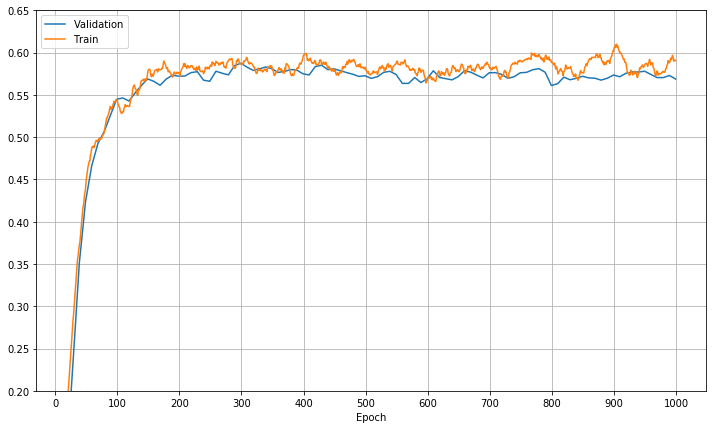

In [91]:
f,axs = plt.subplots(1)

l_lim, r_lim = 0, 1001

plot_runs = [runs[p] for p in plot_df['Name'].values]

for r in plot_runs:
    r.plot(window=20, cols=['Val_acc', 'Acc'], limits=[l_lim,r_lim], ax=axs, x=None)
#axs.legend([r.name for r in plot_runs])
axs.legend(['Validation', 'Train'])

axs.set_xticks(np.arange(l_lim, r_lim, 100))
axs.set_yticks(np.arange(0.1, .9, 0.05))
plt.ylim(.2,.65)

plt.grid()

In [2]:
!ls 

chrpck		crsch.zip  Dockerfile  input	   output  start.sh
crsch_lite.zip	docker	   export      instrct.md  src	   Untitled.ipynb


In [3]:
os.listdir('output/data_2020_Apr_23_20:07:50/')

['gen_540.txt',
 'gen_793.txt',
 'gen_532.txt',
 'gen_615.txt',
 'gen_206.txt',
 'gen_538.txt',
 'gen_147.txt',
 'gen_27.txt',
 'gen_910.txt',
 'gen_950.txt',
 'gen_108.txt',
 'gen_355.txt',
 'gen_385.txt',
 'gen_200.txt',
 'gen_778.txt',
 'gen_389.txt',
 'gen_130.txt',
 'gen_174.txt',
 'gen_577.txt',
 'gen_526.txt',
 'gen_528.txt',
 'gen_124.txt',
 'gen_476.txt',
 'gen_142.txt',
 'gen_459.txt',
 'gen_960.txt',
 'gen_613.txt',
 'gen_983.txt',
 'gen_913.txt',
 'gen_473.txt',
 'gen_923.txt',
 'gen_280.txt',
 'gen_517.txt',
 'gen_700.txt',
 'gen_368.txt',
 'gen_689.txt',
 'gen_836.txt',
 'gen_178.txt',
 'gen_227.txt',
 'gen_751.txt',
 'gen_208.txt',
 'gen_242.txt',
 'gen_64.txt',
 'gen_665.txt',
 'gen_625.txt',
 'gen_275.txt',
 'gen_852.txt',
 'gen_740.txt',
 'gen_739.txt',
 'gen_420.txt',
 'gen_723.txt',
 'gen_273.txt',
 'gen_475.txt',
 'gen_94.txt',
 'gen_822.txt',
 'gen_199.txt',
 'gen_53.txt',
 'gen_866.txt',
 'gen_118.txt',
 'gen_243.txt',
 'gen_256.txt',
 'gen_225.txt',
 'gen_4.txt'

In [4]:
import pandas as pd

In [5]:
with open('output/data_2020_Apr_23_20:07:50/report.txt', 'r') as f:
    data = f.read()

In [6]:
res = []
for d in data.split('\n'):
    try:
        g, a, v, *_ = d.split(',')
        g = g.split(' ')[-1]
        v = v.split(' ')[-1]
        a = a.split(' ')[-1]
        res.append([int(g),float(a),float(v)])
    except:
        pass
    

In [7]:
df = pd.DataFrame(res)
df.head()

,0,1,2
0,361,0.269707,0.228979
1,273,0.264276,0.239284
2,729,0.264265,0.227674
3,328,0.262864,0.212682
4,327,0.260811,0.225188


In [8]:
dfs= df.sort_values?

In [ ]:
dfs= df.sort_values

In [9]:
dfs= df.sort_values(0, ascending=True)
dfs['rl'] = dfs[1]

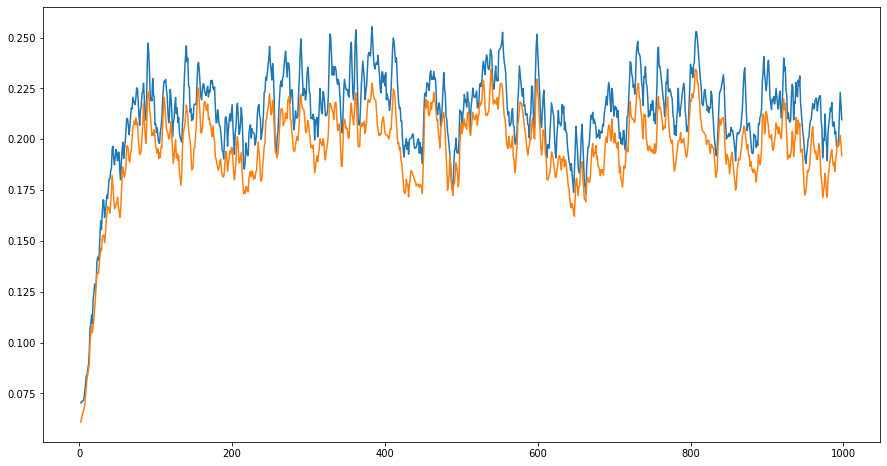

In [10]:
end = -1
y1 = dfs[1][:end].rolling(3).mean()
y2 = dfs[2][:end].rolling(3).mean()

plt.figure(figsize=(15,8))
plt.plot(dfs[0][:end], y1)
plt.plot(dfs[0][:end], y2)

# PYTHON FOR DUMMY

In [ ]:
# test

In [14]:
def poo(arg1, arg2=0):
    print(f'test: {arg1}')
    return arg2

In [30]:
from typing import List

ImportError: cannot import name 'Int'

In [40]:
l = [1,1,3]#list
s = {1,1,3}#set
t = (1,1,3)#tuple
d = {'a':1}#dict
3# int
3.1;#float

In [92]:
d

{'a': 1}

In [19]:
def linear(x -> Int):
    y = 2 * x + 3
    return y

In [29]:
'stroka' + str(3)

'stroka3'

In [22]:
linear('test')

TypeError: must be str, not int

In [16]:
result = poo(arg1=3, arg2='TEST13')

test: 3


In [17]:
result

'TEST13'